#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A">Practica 5: Aplicacion de modelos Random Forest Regression en data set de diabetes Ibarra Ramírez Sergio </font>

Primero importamos los datos de diabetes y separados en Y(variable dependiente) y X (independientes)

In [1]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

In [2]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

Separamos en data de train y test 

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

In [3]:
from sklearn.ensemble import RandomForestRegressor

Definimos y entrenamos el modelo de bosque_diabetes1

In [12]:
bosque_diabetes1 = RandomForestRegressor(n_estimators=100,max_depth=3,max_samples=0.5,max_features=0.5,random_state=2023)

bosque_diabetes1.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, max_features=0.5, max_samples=0.5,
                      random_state=2023)

Se hace la predicicón con el modelo RandomForestRegressor y se evalua el error 

In [13]:
from sklearn.metrics import mean_squared_error

y_pred_diabetes1 = bosque_diabetes1.predict(X_test)
RMSE_diabetes1 = mean_squared_error(y_test,y_pred_diabetes1,squared=False)
print(RMSE_diabetes1) 

62.69419433684478


In [16]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have already obtained the predictions in y_pred and the true values in y_test
mape_diabetes1 = mean_absolute_percentage_error(y_test, y_pred_diabetes1)
print("MAPE:", mape_diabetes1)


MAPE: 0.5255057632045287


In [26]:
bosque_diabetes1.estimators_[0].feature_importances_

array([0.        , 0.        , 0.26777225, 0.03036294, 0.        ,
       0.        , 0.        , 0.00550784, 0.69635698, 0.        ])

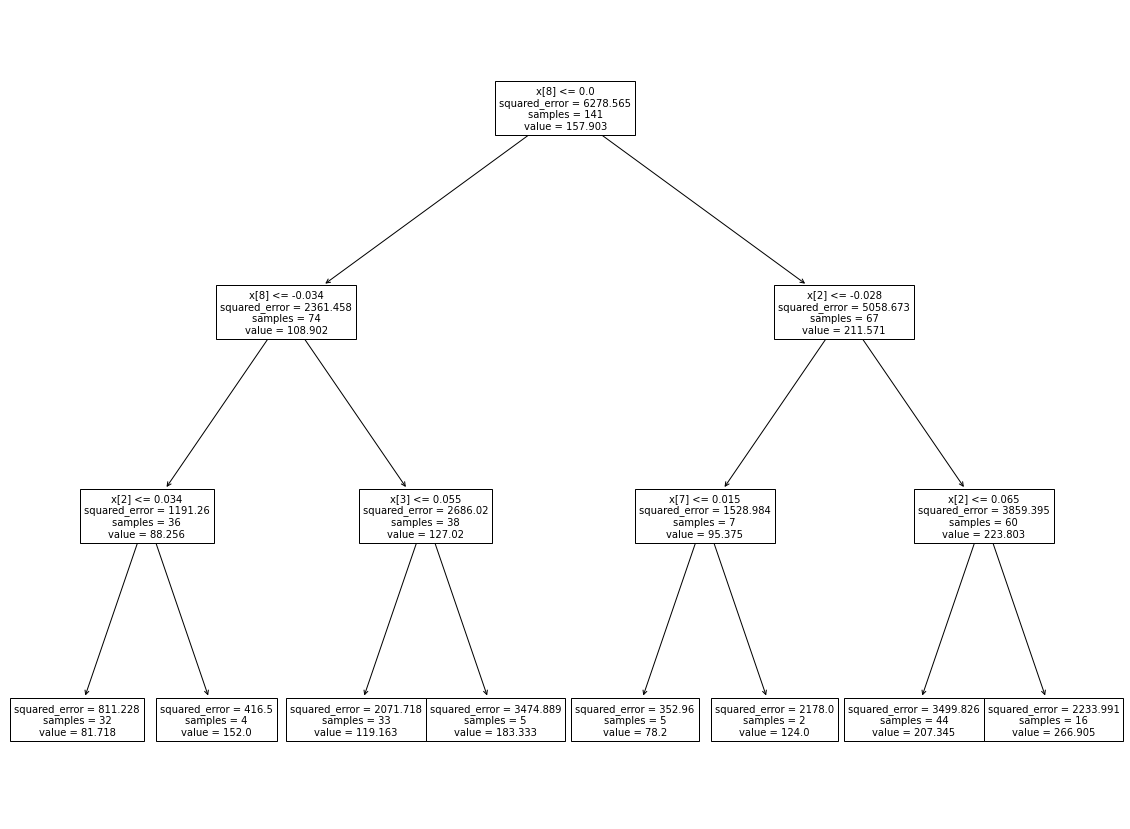

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(bosque_diabetes1.estimators_[0])
plt.show()

Definimos y entrenamos el modelo de bosque_diabetes2

In [15]:
bosque_diabetes2 = RandomForestRegressor(n_estimators=100,max_depth=5,max_samples=0.5,max_features=0.5,random_state=2023)

bosque_diabetes2.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error

y_pred_diabetes2 = bosque_diabetes2.predict(X_test)
RMSE_diabetes2 = mean_squared_error(y_test,y_pred_diabetes2,squared=False)
print(RMSE_diabetes2) 

61.92066616128336


In [17]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have already obtained the predictions in y_pred and the true values in y_test
mape_diabetes2 = mean_absolute_percentage_error(y_test, y_pred_diabetes2)
print("MAPE:", mape_diabetes2)

MAPE: 0.5063825035569836


In [30]:
bosque_diabetes2.estimators_[0].feature_importances_

array([0.06741473, 0.        , 0.18918176, 0.02215701, 0.00454537,
       0.06786895, 0.07727595, 0.        , 0.56939261, 0.0021636 ])

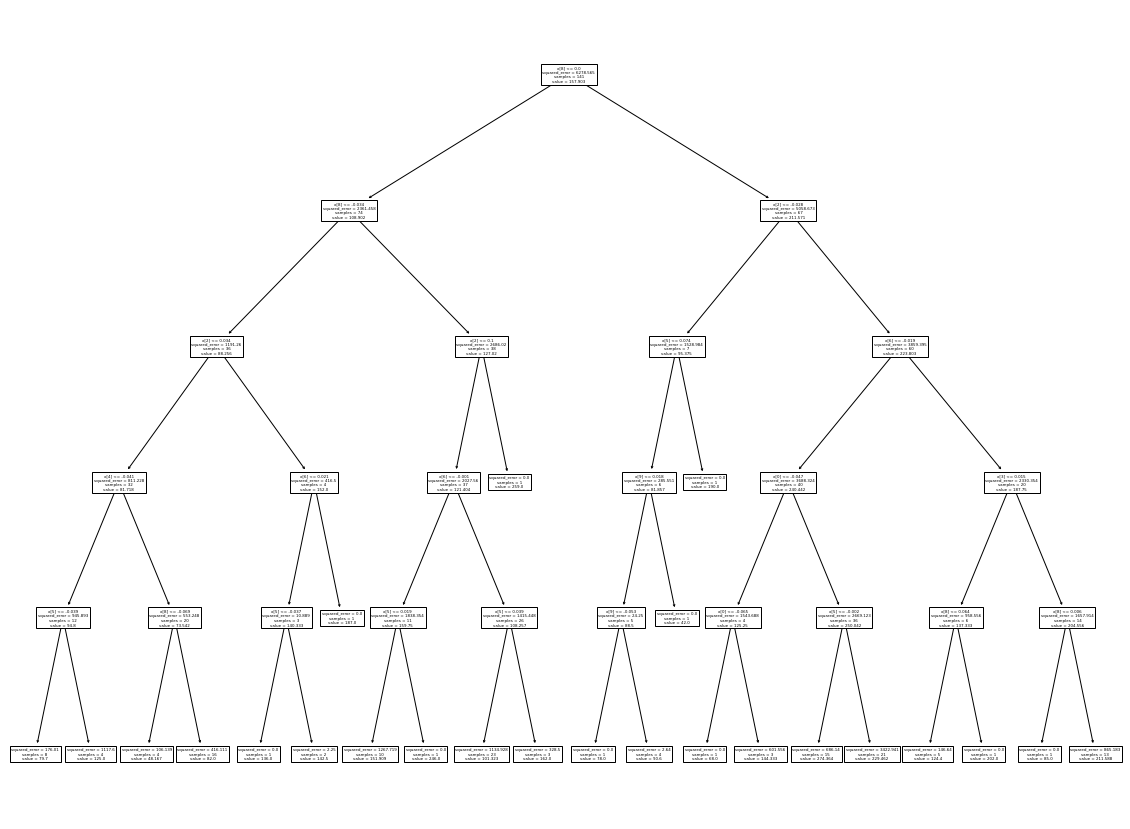

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(bosque_diabetes2.estimators_[0])
plt.show()

Vamos a intentar hacer un loop para intentar construir un feature_importances_average

In [39]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already trained your random forest model bosque_diabetes2

# Initialize an empty array to store the feature importances of each tree
feature_importances = []

# Loop over each tree in the random forest
for i, tree in enumerate(bosque_diabetes2.estimators_):
    # Get the feature importances of the current tree
    importances = tree.feature_importances_
    
    # Append the importances to the feature_importances list
    feature_importances.append(importances)

# Calculate the mean feature importances across all trees
feature_importances_average = np.mean(feature_importances, axis=0)

feature_importances_average


array([0.03915554, 0.00979532, 0.2822014 , 0.09936569, 0.04437962,
       0.04429451, 0.06372989, 0.03146263, 0.31407158, 0.07154384])

Definimos el modelo de Diabetes 3 

In [20]:
bosque_diabetes3 = RandomForestRegressor(n_estimators=100,max_depth=4,max_samples=0.8,max_features=0.4,random_state=2023)

bosque_diabetes3.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error

y_pred_diabetes3 = bosque_diabetes3.predict(X_test)
RMSE_diabetes3 = mean_squared_error(y_test,y_pred_diabetes3,squared=False)
print(RMSE_diabetes3) 

62.20004940991699


In [21]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have already obtained the predictions in y_pred and the true values in y_test
mape_diabetes3 = mean_absolute_percentage_error(y_test, y_pred_diabetes3)
print("MAPE:", mape_diabetes3)

MAPE: 0.5250888641355498


In [32]:
bosque_diabetes3.estimators_[0].feature_importances_

array([0.        , 0.        , 0.20807563, 0.07741349, 0.        ,
       0.01960036, 0.03571171, 0.0202719 , 0.62350857, 0.01541834])

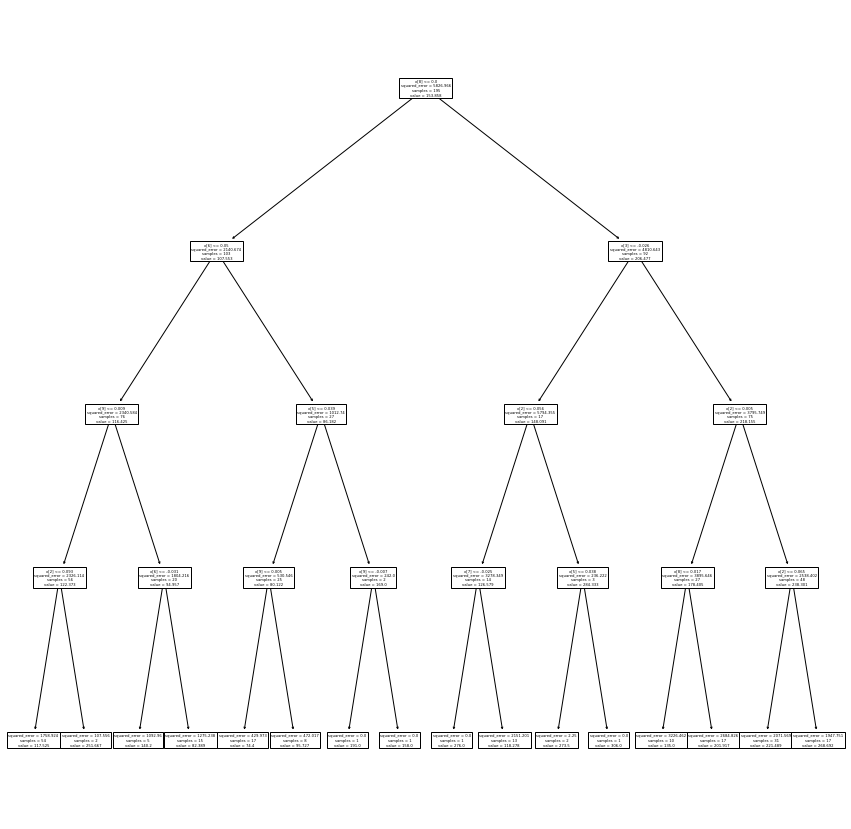

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,15))
tree.plot_tree(bosque_diabetes3.estimators_[0])
plt.show()